In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from scipy import signal

from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis import detect_peaks
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [2]:
plot_directory = '/home/flanigan/temp/'

In [3]:
npd = npy.NumpyDirectory('/data/readout/2017-11-16_154117_scan.npd/')

In [4]:
npd.node_names()

['Scan0',
 'ADCSnap1',
 'ADCSnap2',
 'ADCSnap3',
 'ADCSnap4',
 'ADCSnap5',
 'ADCSnap6',
 'ADCSnap7',
 'ADCSnap8',
 'ADCSnap9',
 'ADCSnap10',
 'ADCSnap11',
 'ADCSnap12',
 'ADCSnap13']

# ADCSnap

In [5]:
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(10.0, 188.0),
 (10.0, 171.0),
 (11.0, 153.0),
 (9.0, 101.0),
 (9.0, 65.0),
 (11.0, 54.0),
 (9.0, 59.0),
 (10.0, 81.0),
 (9.0, 124.0),
 (12.0, 147.0),
 (10.0, 162.0),
 (10.0, 200.0),
 (8.0, 239.0)]

In [7]:
[(snap.x.std(), snap.y.std()) for snap in snaps]

[(1.3646168765344902, 30.464239888052141),
 (1.3354564269043927, 23.690177700709544),
 (1.3598712585324815, 18.253403031188192),
 (1.3490596595718352, 14.119914768329176),
 (1.2985790960453325, 9.379653077933769),
 (1.3563612052926839, 8.4033452230346928),
 (1.3553293469775849, 8.7951496627623822),
 (1.3635998329052272, 11.8965439545225),
 (1.3396481518565062, 16.272727725574235),
 (1.3773159982846563, 21.176409021222618),
 (1.3101860493391402, 24.936962866436048),
 (1.363472124526109, 30.488661765266137),
 (1.3257718950794637, 33.718557983891117)]

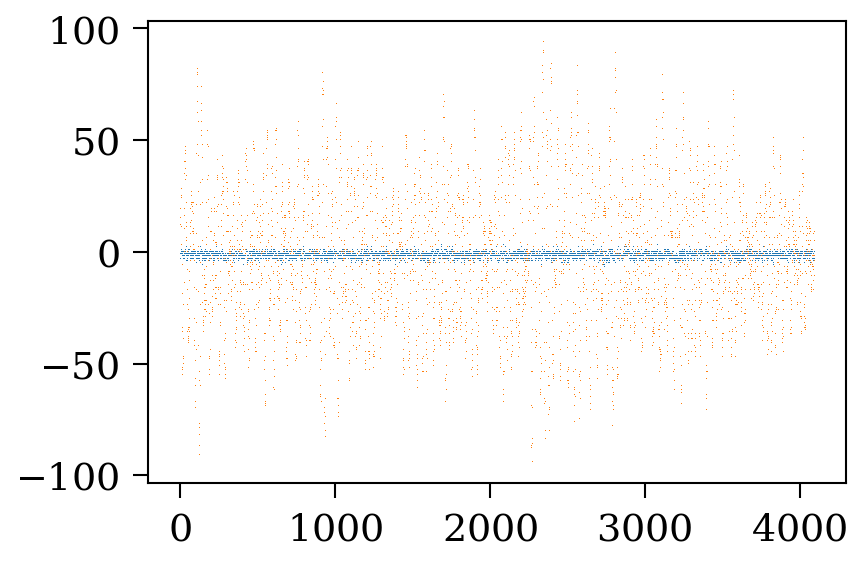

In [8]:
fig, ax = plt.subplots()
ax.plot(snaps[0].x, ',')
ax.plot(snaps[0].y, ',')

# Scan

In [9]:
scan = npd.Scan0

In [10]:
def remove_background(f, s21, amp_degree=4, phi_degree=4, weights=None):
    if weights is None:
        weights = np.abs(s21)**2
    amp_poly = np.polyfit(f, np.abs(s21), deg=amp_degree, w=weights)
    phi_poly = np.polyfit(f, np.unwrap(np.angle(s21)), deg=phi_degree, w=weights)
    return s21 / (np.polyval(amp_poly, f) * np.exp(1j * np.polyval(phi_poly, f)))

# Raw data

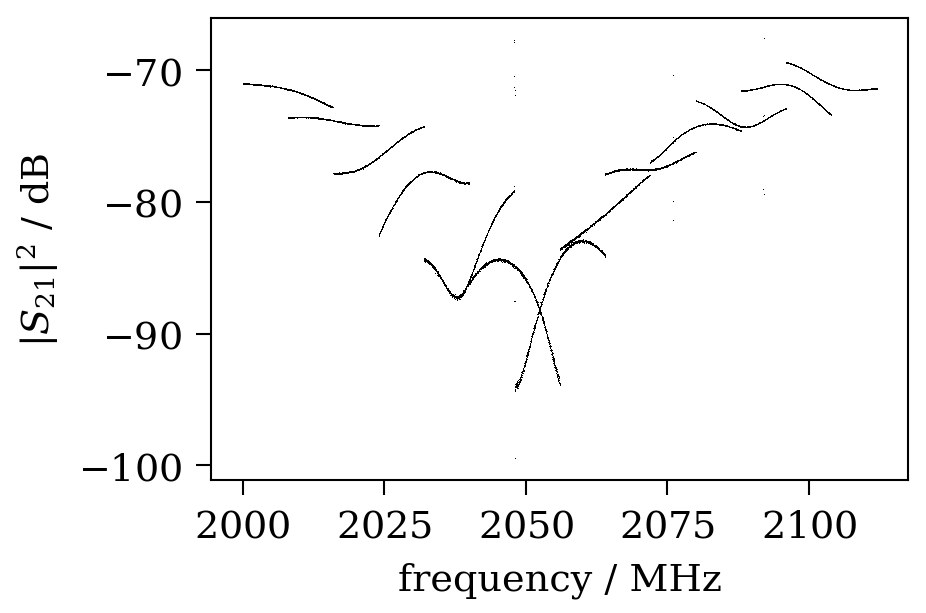

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz', rotation='horizontal')
ax.set_ylabel('$|S_{21}|^2$ / dB', rotation='vertical')
ax.set_yscale('linear')
ax.set_yscale('linear')
for sa in scan.sweep_arrays:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), ',k')
ax.legend()
#ax.set_ylim()
#ax.set_xlim()
